<a href="https://colab.research.google.com/github/ezio341/PCVK_Genap_20-21/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Global Threshold Manual

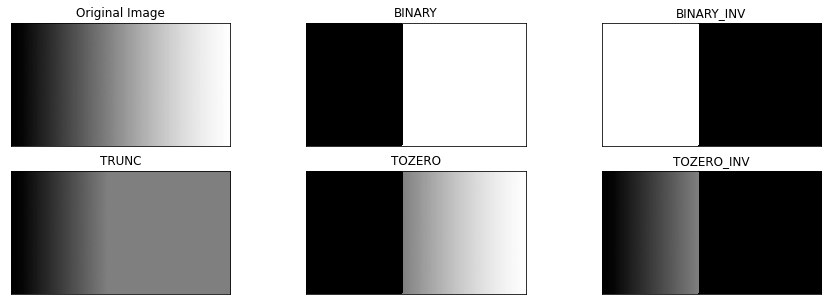

In [2]:
filename_1 = ('/content/drive/MyDrive/Assets/gradient.jpg')
img_g = cv2.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1)
thresh2 = cv2.imread(filename_1)
thresh3 = cv2.imread(filename_1)
thresh4 = cv2.imread(filename_1)
thresh5 = cv2.imread(filename_1)
thresh = 127    #127 adalah nilai Threshold yang ditentukan

#1. Original Image
thresh1[img_g>thresh] = 255
thresh1[img_g<=thresh] = 0
#2. Binary threshold inverse
thresh2 = 255 - thresh1           
#3. Threshold Truncate
thresh3[img_g>thresh] = thresh
#4. Threshold Tozero
thresh4[img_g<=thresh] = 0
#5. Threshold Tozero Inverse
thresh5[img_g>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()


Otsu Thresholding Manual

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


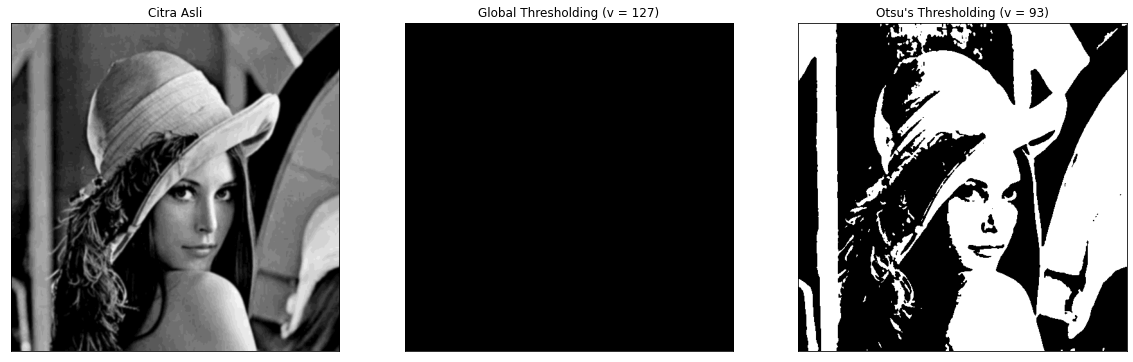

In [3]:
filename_2 = ('/content/drive/MyDrive/Assets/lena_gs_lc2.jpg')
img_lgs = cv2.imread(filename_2, 0)
blur = cv2.GaussianBlur(img_lgs, (5,5),0)
hist = cv2.calcHist([blur],[0],None,[256], [0,256])

hist_norm = hist.ravel()/hist.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
thresh = -1

for i in range(0,255):
  wb += hist[i]
  wf = (img_lgs.shape[0]*img_lgs.shape[1]) - wb
  sumb += (i*hist[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)

  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i

x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (blur, thresh, 255, cv2. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Histogram from a segmented image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

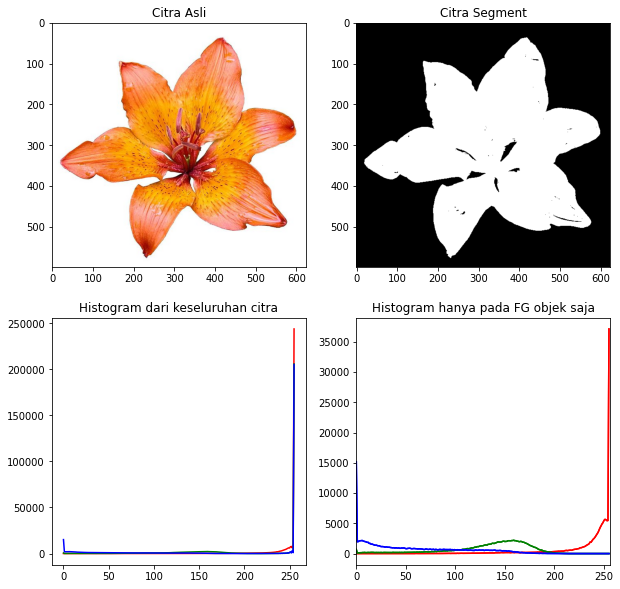

In [5]:
filename_3 = ('/content/drive/MyDrive/Assets/lily.jpg')
img_l = cv2.imread(filename_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

Color segmentation on the image

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff86f679850>,
 <matplotlib.image.AxesImage at 0x7ff86f5e0a10>)

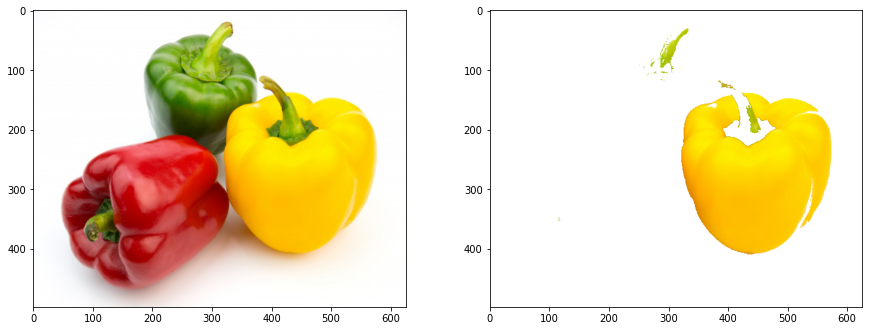

In [28]:
filename_4 = ('/content/drive/MyDrive/Assets/peppers.jpg')
img_p = cv2.imread(filename_4) 
img_rgb2 = cv2.cvtColor(img_p,cv2.COLOR_BGR2RGB)

pixel_values = img_rgb2.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, 
cv2.KMEANS_RANDOM_CENTERS)

# conversion centroid dot to integer
centers = np.uint8(centers)

# flattening label array
labels = labels.flatten()

masked_image = np.copy(img_rgb2)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img_rgb2.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img_rgb2)
plt.subplot(2,2,2),plt.imshow(masked_image0)

#The color will be show buy the closest cluster, so the color image not always same

 Binary thresholding

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff86ec260d0>,
 <matplotlib.image.AxesImage at 0x7ff86ebbeb90>)

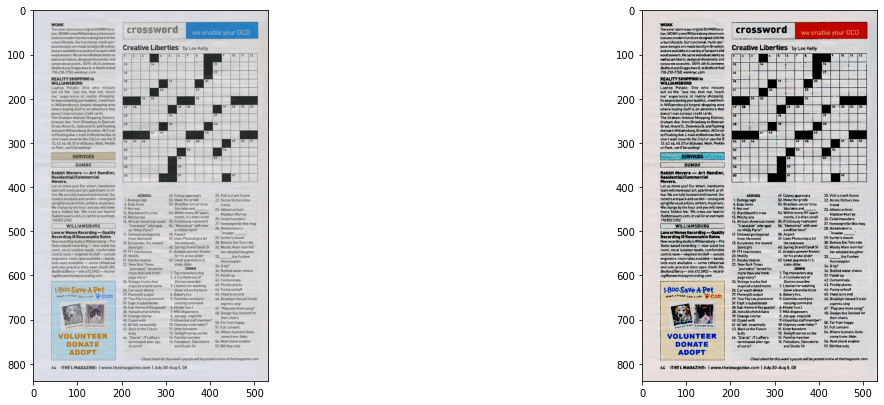

In [43]:
img_c = cv2.imread('/content/drive/MyDrive/Assets/crossword.jpg')
img_rgb3 = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(img_rgb3, 150, 255, cv2.THRESH_TOZERO)

plt.figure(figsize = (20,15))
plt.subplot(2,2,1),plt.imshow(img_c)
plt.subplot(2,2,2),plt.imshow(thresh)